In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from ltl.dataprocessing import get_skeleton_traj, get_var_from_generations, get_var_from_runs

# Initialization

In [97]:
traj_name = 'LTL-FUN-ES_2017_10_03_20h35m18s'
file_name = "/calc/anand/output/LTL-FUN-ES/run-num-test/%s.hdf5" % traj_name

In [98]:
traj = get_skeleton_traj(file_name, traj_name)

# Plot fitness

In [99]:
fitness_list, run_id_list = get_var_from_runs(traj, 'results.fitness', with_ids=True, status_interval=200)

In [100]:
algorithm_params_list = get_var_from_generations(traj, 'algorithm_params')
algorithm_params_list[-1]

{'average_fitness_in_run': 0.11814749790793708,
 'best_fitness_in_run': 0.3366809490122817,
 'generation': 999,
 'pop_size': 10}

In [101]:
best_fitness_list = [x['best_fitness_in_run'] for x in algorithm_params_list]
average_fitness_list = [x['average_fitness_in_run'] for x in algorithm_params_list]
generation_list = [x['generation'] for x in algorithm_params_list]

In [102]:
pop_size_list = [params_dict['pop_size'] for params_dict in algorithm_params_list]

pop_size_list_cumsum = np.cumsum(pop_size_list)
gen_no_list = np.zeros_like(run_id_list)  # gen_no_list[i] = gen no of ith run
gen_no_list[pop_size_list_cumsum[:-1]] = 1
gen_no_list = np.cumsum(gen_no_list)

fitness_list = -1 * np.array(fitness_list)

/home/anand/.virtualenvs/ltl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


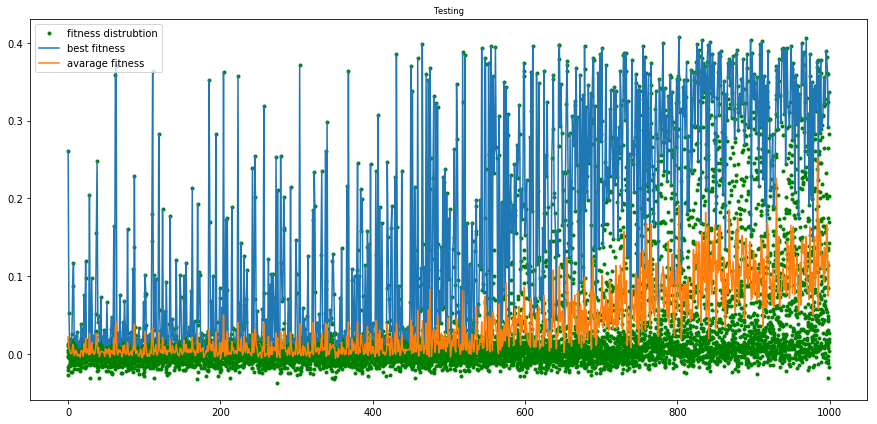

In [103]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(gen_no_list, fitness_list, 'g.', label='fitness distrubtion')
ax.plot(generation_list, best_fitness_list, label='best fitness')
ax.plot(generation_list, average_fitness_list, label='avarage fitness')
ax.legend()
ax.set_title("Testing", fontsize='small')
# ax.set_ylim([-1, 1])

# Plot explored points

In [104]:
individual_list, run_id_list = get_var_from_runs(traj, 'results.individual', with_ids=True, status_interval=200)

In [105]:
from ltl import dict_to_list, list_to_dict

individual_list_arr = [dict_to_list(ind) for ind in individual_list]

xs = [p[0] for p in individual_list_arr]
ys = [p[1] for p in individual_list_arr]

[(-5, 5), (-5, 5)]

/home/anand/.virtualenvs/ltl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


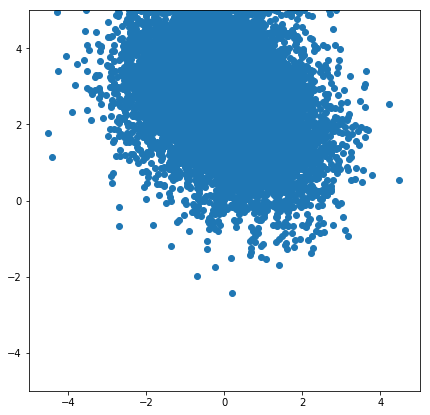

In [107]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(xs, ys)
ax.set(xlim=(-5,5), ylim=(-5,5))

# General test

In [34]:
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
XX, YY = np.meshgrid(X, Y)
Z = [x**2 + y**2 for x, y in zip(XX.ravel(), YY.ravel())]
Z = np.array(Z).reshape(XX.shape)

/home/anand/.virtualenvs/ltl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


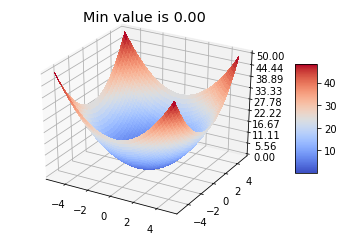

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection=Axes3D.name)
# Plot the surface.
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set(title='Min value is %.2f' % np.min(Z))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [36]:
np.min(Z)

6.3108872417680944e-28

In [37]:
W = np.where(Z == np.min(Z))

In [40]:
"%.2f, %.2f" % (X[W[0]], Y[W[1]])

'-0.00, -0.00'